## Predict Traffic in Bogor City (focus on Tol Jagorawi)

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

from matplotlib import style
plt.rcParams['figure.figsize'] = 50,50
style.use('ggplot')

import os

In [2]:
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))

matplotlib: 3.5.2


In [3]:
df = pd.read_csv("D:\dsi\mini project data scientist\data\jams_Kota Bogor.csv")
df.sample(20)

,Unnamed: 0,time,kemendagri_kabupaten_kode,kemendagri_kabupaten_nama,street,level,median_length,median_delay,median_speed_kmh,total_records,id,date,median_level,geometry
96542,17178,2022-09-02 08:00:00.000,32.71,KOTA BOGOR,N9 Underpass KH Soleh Iskandar,4,627.0,401.5,5.005000,20,37072134,2022-09-02,4.0,"MULTILINESTRING ((106.800519 -6.562005, 106.80..."
18462,18462,2022-07-17 15:00:00.000,32.71,KOTA BOGOR,Achmad Adnawijaya,2,1022.0,124.5,14.129999,16,34196613,2022-07-17,2.0,"MULTILINESTRING ((106.816439 -6.589038, 106.81..."
54409,54409,2022-08-07 12:00:00.000,32.71,KOTA BOGOR,Pulo Empang,3,590.0,258.0,5.910000,58,35545362,2022-08-07,3.0,"MULTILINESTRING ((106.791788 -6.607135, 106.79..."
12623,12623,2022-07-14 15:00:00.000,32.71,KOTA BOGOR,KH Soleh Iskandar (Jalur Lambat),2,631.0,71.5,15.910000,12,33955577,2022-07-14,2.0,"MULTILINESTRING ((106.805165 -6.561226, 106.80..."
13575,13575,2022-07-15 10:00:00.000,32.71,KOTA BOGOR,Jalan Empang,2,406.0,70.0,11.180000,9,34019578,2022-07-15,2.0,"MULTILINESTRING ((106.795658 -6.605744, 106.79..."
54668,54668,2022-08-07 14:00:00.000,32.71,KOTA BOGOR,Jalan Sukaraja,2,929.0,105.0,12.780001,18,35545626,2022-08-07,2.0,"MULTILINESTRING ((106.833339 -6.619085, 106.83..."
55082,55082,2022-08-07 16:00:00.000,32.71,KOTA BOGOR,N9 Jalan Raya Tajur,1,2097.0,127.0,27.550000,23,35546018,2022-08-07,1.0,"MULTILINESTRING ((106.824909 -6.63156, 106.824..."
66648,66648,2022-08-14 15:00:00.000,32.71,KOTA BOGOR,Letjen Ibrahim Adjie,1,1359.0,72.0,25.755001,22,35971999,2022-08-14,1.0,"MULTILINESTRING ((106.771077 -6.584933, 106.77..."
57059,57059,2022-08-08 19:00:00.000,32.71,KOTA BOGOR,N9 Jalan Raya Ciawi,2,1340.0,186.0,14.920000,1,35604701,2022-08-08,2.0,"LINESTRING (106.847234 -6.655619, 106.847295 -..."
17587,17587,2022-07-17 09:00:00.000,32.71,KOTA BOGOR,Atang Sanjaya,1,938.0,95.0,15.230000,41,34195715,2022-07-17,1.0,"MULTILINESTRING ((106.752241 -6.545421, 106.75..."


In [4]:
df.sample(10)

,Unnamed: 0,time,kemendagri_kabupaten_kode,kemendagri_kabupaten_nama,street,level,median_length,median_delay,median_speed_kmh,total_records,id,date,median_level,geometry
19947,19947,2022-07-18 11:00:00.000,32.71,KOTA BOGOR,Cimanggu Raya,2,521.0,140.0,7.670,2,34263279,2022-07-18,2.0,"LINESTRING (106.788501 -6.570143, 106.789215 -..."
6807,6807,2022-07-10 15:00:00.000,32.71,KOTA BOGOR,Surya Kencana,3,992.0,317.5,8.045,42,33721812,2022-07-10,3.0,"MULTILINESTRING ((106.799413 -6.604238, 106.79..."
5201,5201,2022-07-09 12:00:00.000,32.71,KOTA BOGOR,Letjen Ibrahim Adjie,3,360.0,118.0,7.870,17,33668694,2022-07-09,3.0,"MULTILINESTRING ((106.753373 -6.576191, 106.75..."
473,473,2022-07-06 12:00:00.000,32.71,KOTA BOGOR,Binamarga,4,306.0,98.0,7.710,1,33469490,2022-07-06,4.0,"LINESTRING (106.809613 -6.6045, 106.809142 -6...."
43403,43403,2022-08-01 07:00:00.000,32.71,KOTA BOGOR,KH Ahmad Sya'yani,3,468.0,87.0,8.620,2,35154069,2022-08-01,3.0,"LINESTRING (106.777224 -6.526313, 106.777173 -..."
28690,28690,2022-07-23 19:00:00.000,32.71,KOTA BOGOR,Terusan Pajajaran,3,355.0,103.0,9.890,1,34568488,2022-07-23,3.0,"LINESTRING (106.810677 -6.602074, 106.809945 -..."
46838,46838,2022-08-03 10:00:00.000,32.71,KOTA BOGOR,Dr Sumeru,1,1046.0,66.0,21.790,3,35269676,2022-08-03,1.0,"MULTILINESTRING ((106.774169 -6.57868, 106.775..."
24684,24684,2022-07-21 13:00:00.000,32.71,KOTA BOGOR,RE Abdullah,3,505.0,164.0,8.000,5,34436220,2022-07-21,3.0,"MULTILINESTRING ((106.779668 -6.596205, 106.77..."
33734,33734,2022-07-26 17:00:00.000,32.71,KOTA BOGOR,N8 Jalan Raya Bogor,3,693.0,143.0,10.790,103,34764932,2022-07-26,3.0,"MULTILINESTRING ((106.813488 -6.559995, 106.81..."
10158,10158,2022-07-12 22:00:00.000,32.71,KOTA BOGOR,N9 Raden KH Abdullah bin Nuh,3,1121.0,180.5,14.920,12,33831694,2022-07-12,3.0,"MULTILINESTRING ((106.764675 -6.562672, 106.76..."


**I want to check the Jagorawi toll road because it is a public road that is used to reach the top of Bogor**

In [5]:
df = df[df.street.str.contains('Tol Jagorawi') == True]

In [6]:
df.sample(10)

,Unnamed: 0,time,kemendagri_kabupaten_kode,kemendagri_kabupaten_nama,street,level,median_length,median_delay,median_speed_kmh,total_records,id,date,median_level,geometry
10188,10188,2022-07-13 02:00:00.000,32.71,KOTA BOGOR,Tol Jagorawi,2,4961.5,205.0,40.405000,2,33893956,2022-07-13,2.0,"MULTILINESTRING ((106.831375 -6.60523, 106.831..."
11201,11201,2022-07-13 16:00:00.000,32.71,KOTA BOGOR,Tol Jagorawi,2,1532.0,69.0,32.590000,16,33895063,2022-07-13,2.0,"MULTILINESTRING ((106.832055 -6.613704, 106.83..."
32595,32595,2022-07-26 06:00:00.000,32.71,KOTA BOGOR,Tol Jagorawi,3,461.0,94.0,13.020000,8,34763810,2022-07-26,3.0,"MULTILINESTRING ((106.840008 -6.633063, 106.83..."
63511,63511,2022-08-13 03:00:00.000,32.71,KOTA BOGOR,Tol Jagorawi,2,1532.0,71.5,32.625000,6,35901275,2022-08-13,2.0,"MULTILINESTRING ((106.832055 -6.613704, 106.83..."
26985,26985,2022-07-23 01:00:00.000,32.71,KOTA BOGOR,Tol Jagorawi,1,3237.0,67.0,57.765000,2,34566660,2022-07-23,1.0,"LINESTRING (106.834041 -6.59138, 106.835277 -6..."
84895,5531,2022-08-26 17:00:00.000,32.71,KOTA BOGOR,Tol Jagorawi,1,5722.0,164.0,50.290000,15,36639211,2022-08-26,1.0,"MULTILINESTRING ((106.846753 -6.554837, 106.84..."
93334,13970,2022-08-31 07:00:00.000,32.71,KOTA BOGOR,Tol Jagorawi,1,4504.0,88.0,54.970000,3,36956447,2022-08-31,1.0,"MULTILINESTRING ((106.831746 -6.609062, 106.83..."
99383,20019,2022-09-03 15:00:00.000,32.71,KOTA BOGOR,Tol Jagorawi,1,1178.0,60.0,32.140000,1,37148484,2022-09-03,1.0,"LINESTRING (106.844761 -6.639406, 106.845669 -..."
55661,55661,2022-08-07 22:00:00.000,32.71,KOTA BOGOR,Tol Jagorawi,3,730.0,97.5,18.845001,8,35546608,2022-08-07,3.0,"MULTILINESTRING ((106.846172 -6.64133, 106.846..."
49776,49776,2022-08-04 23:00:00.000,32.71,KOTA BOGOR,Tol Jagorawi,3,808.0,146.5,16.175000,26,35330416,2022-08-04,3.0,"MULTILINESTRING ((106.84182 -6.635451, 106.843..."


In [7]:
df.street.unique()

array(['Tol Jagorawi',
       'Arah Tol Lkr Luar Bogor/Tol Jagorawi (Lewat Jalan Tol)'],
      dtype=object)

In [8]:
df.time.unique()

array(['2022-07-06 02:00:00.000', '2022-07-06 03:00:00.000',
       '2022-07-06 04:00:00.000', '2022-07-06 09:00:00.000',
       '2022-07-06 14:00:00.000', '2022-07-06 16:00:00.000',
       '2022-07-07 00:00:00.000', '2022-07-07 10:00:00.000',
       '2022-07-07 15:00:00.000', '2022-07-07 17:00:00.000',
       '2022-07-08 00:00:00.000', '2022-07-08 05:00:00.000',
       '2022-07-09 00:00:00.000', '2022-07-09 02:00:00.000',
       '2022-07-09 03:00:00.000', '2022-07-09 14:00:00.000',
       '2022-07-10 00:00:00.000', '2022-07-10 14:00:00.000',
       '2022-07-10 15:00:00.000', '2022-07-10 16:00:00.000',
       '2022-07-12 15:00:00.000', '2022-07-12 16:00:00.000',
       '2022-07-12 17:00:00.000', '2022-07-12 18:00:00.000',
       '2022-07-12 19:00:00.000', '2022-07-12 20:00:00.000',
       '2022-07-12 21:00:00.000', '2022-07-13 01:00:00.000',
       '2022-07-13 02:00:00.000', '2022-07-13 16:00:00.000',
       '2022-07-13 19:00:00.000', '2022-07-13 23:00:00.000',
       '2022-07-14 00:00

In [9]:
df.time.dtype

dtype('O')

<H3>Data Contains</H3>

<ol>
    <li><b>time</b> Time (every hour)</li>
    <li><b>kemendagri_kabupaten_kode</b>Kemendagri code of cities</li> 
    <li><b>kemendagri_kabupaten_nama</b> Kemendagri name of cities</li>
    <li><b>street</b> Street name</li>
    <li><b>level</b> Traffic congestion level (0 = free flow 5 = blocked)</li>
        <ul>
            <li>0 = free flow speed to 80% of free flow speed</li>
            <li>1 = 80% to 61% of free flow speed</li>
            <li>2 = 60% to 41%</li>
            <li>3 = 40% to 21%</li>
            <li>4 = 20% to 1%</li>
            <li>5 = blocked road</li>
        </ul>
    <li><b>median_length</b> Jam length in meters (median)</li>
    <li><b>median_delay</b> Delay of jam (in seconds) compared to free flow speed (in case of block, -1) (median)</li>
    <li><b>median_speed_kmh </b> Current median speed on jammed segments in km/h</li>
    <li><b>total_records</b> Total data recorded in a given time</li>
    <li><b>id</b> Row ID</li>
    <li><b>date</b> Date</li>
    <li><b>geometry</b> Geometry data type (spatial data)</li>
</ol>

In [10]:
df = df[['time','median_length','median_delay','median_speed_kmh','total_records','date','median_level']]
df.sample(10)

,time,median_length,median_delay,median_speed_kmh,total_records,date,median_level
6374,2022-07-10 00:00:00.000,591.0,96.0,13.820,2,2022-07-10,3.0
87426,2022-08-27 18:00:00.000,1312.0,80.0,27.400,12,2022-08-27,3.0
55230,2022-08-07 17:00:00.000,394.0,143.0,7.770,1,2022-08-07,4.0
88548,2022-08-28 12:00:00.000,492.5,87.5,12.485,12,2022-08-28,3.0
88572,2022-08-28 13:00:00.000,1532.0,82.0,31.040,20,2022-08-28,2.0
46487,2022-08-03 02:00:00.000,1433.5,63.0,35.035,2,2022-08-03,2.0
33294,2022-07-26 14:00:00.000,1287.0,141.5,21.570,10,2022-07-26,3.0
15008,2022-07-16 04:00:00.000,1633.0,76.0,30.590,3,2022-07-16,2.0
54777,2022-08-07 14:00:00.000,1532.0,70.0,33.130,23,2022-08-07,2.0
62811,2022-08-12 16:00:00.000,3194.0,85.0,47.570,3,2022-08-12,1.0


In [11]:
shape = df.shape
print('Total rows:',shape[0], '\nTotal columns:',shape[1])

Total rows: 587 
Total columns: 7


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 587 entries, 9 to 102321
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   time              587 non-null    object 
 1   median_length     587 non-null    float64
 2   median_delay      587 non-null    float64
 3   median_speed_kmh  587 non-null    float64
 4   total_records     587 non-null    int64  
 5   date              587 non-null    object 
 6   median_level      587 non-null    float64
dtypes: float64(4), int64(1), object(2)
memory usage: 36.7+ KB


In [13]:
df.duplicated().sum()

0

In [14]:
## remove duplicate values for all column

df.drop_duplicates(inplace=True)

In [15]:
## cheking shape after dropping duplicate value

shape = df.shape
print('Total rows:',shape[0], '\nTotal columns:',shape[1])

Total rows: 587 
Total columns: 7


In [16]:
#cheking sum of duplicate value

df.duplicated().sum()

0

In [17]:
df.describe()

,median_length,median_delay,median_speed_kmh,total_records,median_level
count,587.000000,587.000000,587.000000,587.000000,587.000000
mean,1905.939523,129.830494,29.596448,8.110733,2.197615
std,1402.808824,132.170496,15.377710,8.340636,0.973257
min,206.000000,18.000000,2.210000,1.000000,1.000000
25%,889.000000,74.000000,15.917500,2.000000,1.000000
50%,1532.000000,94.000000,29.450000,5.000000,2.000000
75%,2828.000000,130.250000,43.245000,11.000000,3.000000
max,6523.000000,1938.000000,60.630000,51.000000,4.000000


In [18]:
count_level_values = df['median_level'].nunique()
level_values = df['median_level'].unique()

count_date_values = df['date'].nunique()
date_values = df['date'].unique()


print ('count_level_values:', count_level_values, '\nlevel_values:',level_values, '\n\ncount_date_values:', count_date_values,
      '\ndate_values:',date_values)

count_level_values: 4 
level_values: [2. 1. 3. 4.] 

count_date_values: 60 
date_values: ['2022-07-06' '2022-07-07' '2022-07-08' '2022-07-09' '2022-07-10'
 '2022-07-12' '2022-07-13' '2022-07-14' '2022-07-15' '2022-07-16'
 '2022-07-17' '2022-07-18' '2022-07-19' '2022-07-20' '2022-07-22'
 '2022-07-23' '2022-07-24' '2022-07-25' '2022-07-26' '2022-07-27'
 '2022-07-28' '2022-07-29' '2022-07-30' '2022-07-31' '2022-08-01'
 '2022-08-02' '2022-08-03' '2022-08-04' '2022-08-05' '2022-08-06'
 '2022-08-07' '2022-08-08' '2022-08-09' '2022-08-10' '2022-08-11'
 '2022-08-12' '2022-08-13' '2022-08-14' '2022-08-15' '2022-08-16'
 '2022-08-17' '2022-08-18' '2022-08-19' '2022-08-20' '2022-08-21'
 '2022-08-22' '2022-08-23' '2022-08-24' '2022-08-25' '2022-08-26'
 '2022-08-27' '2022-08-28' '2022-08-29' '2022-08-30' '2022-08-31'
 '2022-09-01' '2022-09-02' '2022-09-03' '2022-09-04' '2022-09-06']


**As we can see, there are date values contain no date format. I will drop it**

In [19]:
import re

In [20]:
df2 = df[df.date.str.contains('2022') == True]

In [21]:
df2.date.unique()

array(['2022-07-06', '2022-07-07', '2022-07-08', '2022-07-09',
       '2022-07-10', '2022-07-12', '2022-07-13', '2022-07-14',
       '2022-07-15', '2022-07-16', '2022-07-17', '2022-07-18',
       '2022-07-19', '2022-07-20', '2022-07-22', '2022-07-23',
       '2022-07-24', '2022-07-25', '2022-07-26', '2022-07-27',
       '2022-07-28', '2022-07-29', '2022-07-30', '2022-07-31',
       '2022-08-01', '2022-08-02', '2022-08-03', '2022-08-04',
       '2022-08-05', '2022-08-06', '2022-08-07', '2022-08-08',
       '2022-08-09', '2022-08-10', '2022-08-11', '2022-08-12',
       '2022-08-13', '2022-08-14', '2022-08-15', '2022-08-16',
       '2022-08-17', '2022-08-18', '2022-08-19', '2022-08-20',
       '2022-08-21', '2022-08-22', '2022-08-23', '2022-08-24',
       '2022-08-25', '2022-08-26', '2022-08-27', '2022-08-28',
       '2022-08-29', '2022-08-30', '2022-08-31', '2022-09-01',
       '2022-09-02', '2022-09-03', '2022-09-04', '2022-09-06'],
      dtype=object)

In [22]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 587 entries, 9 to 102321
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   time              587 non-null    object 
 1   median_length     587 non-null    float64
 2   median_delay      587 non-null    float64
 3   median_speed_kmh  587 non-null    float64
 4   total_records     587 non-null    int64  
 5   date              587 non-null    object 
 6   median_level      587 non-null    float64
dtypes: float64(4), int64(1), object(2)
memory usage: 36.7+ KB


In [23]:
df2['median_level'] = df2['median_level'].replace({'1':1,'2':2,'3':3,'4':4,'5':5}, regex=True)

In [24]:
df2[['median_length','median_delay','median_speed_kmh','total_records']] = df2[['median_length','median_delay','median_speed_kmh','total_records']].apply(pd.to_numeric)
df2[['median_level','total_records']] = df2[['median_level','total_records']].astype(int)

In [25]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 587 entries, 9 to 102321
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   time              587 non-null    object 
 1   median_length     587 non-null    float64
 2   median_delay      587 non-null    float64
 3   median_speed_kmh  587 non-null    float64
 4   total_records     587 non-null    int32  
 5   date              587 non-null    object 
 6   median_level      587 non-null    int32  
dtypes: float64(3), int32(2), object(2)
memory usage: 32.1+ KB


In [26]:
df2.median_level.unique()

array([2, 1, 3, 4])

In [27]:
count_level_values = df2['median_level'].nunique()
level_values = df2['median_level'].unique()

count_date_values = df2['date'].nunique()
date_values = df2['date'].unique()


print ('count_level_values:', count_level_values, '\nlevel_values:',level_values, '\n\ncount_date_values:', count_date_values,
      '\ndate_values:',date_values)

count_level_values: 4 
level_values: [2 1 3 4] 

count_date_values: 60 
date_values: ['2022-07-06' '2022-07-07' '2022-07-08' '2022-07-09' '2022-07-10'
 '2022-07-12' '2022-07-13' '2022-07-14' '2022-07-15' '2022-07-16'
 '2022-07-17' '2022-07-18' '2022-07-19' '2022-07-20' '2022-07-22'
 '2022-07-23' '2022-07-24' '2022-07-25' '2022-07-26' '2022-07-27'
 '2022-07-28' '2022-07-29' '2022-07-30' '2022-07-31' '2022-08-01'
 '2022-08-02' '2022-08-03' '2022-08-04' '2022-08-05' '2022-08-06'
 '2022-08-07' '2022-08-08' '2022-08-09' '2022-08-10' '2022-08-11'
 '2022-08-12' '2022-08-13' '2022-08-14' '2022-08-15' '2022-08-16'
 '2022-08-17' '2022-08-18' '2022-08-19' '2022-08-20' '2022-08-21'
 '2022-08-22' '2022-08-23' '2022-08-24' '2022-08-25' '2022-08-26'
 '2022-08-27' '2022-08-28' '2022-08-29' '2022-08-30' '2022-08-31'
 '2022-09-01' '2022-09-02' '2022-09-03' '2022-09-04' '2022-09-06']


In [28]:
df2.describe()

,median_length,median_delay,median_speed_kmh,total_records,median_level
count,587.000000,587.000000,587.000000,587.000000,587.000000
mean,1905.939523,129.830494,29.596448,8.110733,2.197615
std,1402.808824,132.170496,15.377710,8.340636,0.973257
min,206.000000,18.000000,2.210000,1.000000,1.000000
25%,889.000000,74.000000,15.917500,2.000000,1.000000
50%,1532.000000,94.000000,29.450000,5.000000,2.000000
75%,2828.000000,130.250000,43.245000,11.000000,3.000000
max,6523.000000,1938.000000,60.630000,51.000000,4.000000


In [29]:
df2.shape

(587, 7)

In [30]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 587 entries, 9 to 102321
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   time              587 non-null    object 
 1   median_length     587 non-null    float64
 2   median_delay      587 non-null    float64
 3   median_speed_kmh  587 non-null    float64
 4   total_records     587 non-null    int32  
 5   date              587 non-null    object 
 6   median_level      587 non-null    int32  
dtypes: float64(3), int32(2), object(2)
memory usage: 32.1+ KB


In [31]:
df2.dtypes

time                 object
median_length       float64
median_delay        float64
median_speed_kmh    float64
total_records         int32
date                 object
median_level          int32
dtype: object

In [32]:
df2['time'] = pd.to_datetime(df2['time'])
print(df2['time'].dtypes)

datetime64[ns]


In [33]:
df2['date'] = pd.to_datetime(df2['date'])
print(df2['date'].dtypes)

datetime64[ns]


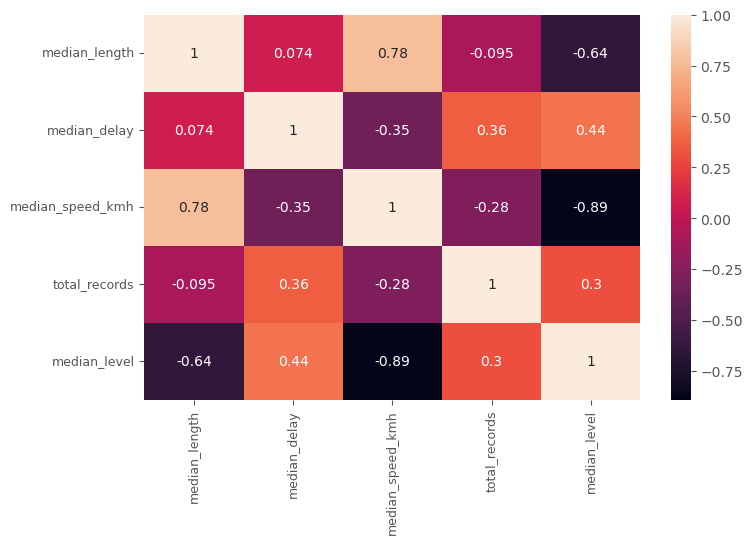

In [34]:
# Correlation matrix
corr= df2.corr()
#print(corr)

# Heatmap
fig, ax = plt.subplots(figsize=(8,5))
sns.color_palette("rocket", as_cmap=True)

sns.heatmap(corr,annot=True, yticklabels=True, square=False)
# sns.heatmap(corrmat, yticklabels=True, square= False, annot=True)
ax.tick_params(labelsize=9)


### Data Preprocessing

**Cheking null values**

In [35]:
df2.isna().sum()

time                0
median_length       0
median_delay        0
median_speed_kmh    0
total_records       0
date                0
median_level        0
dtype: int64

No missing data. Excellent!!

<AxesSubplot:>

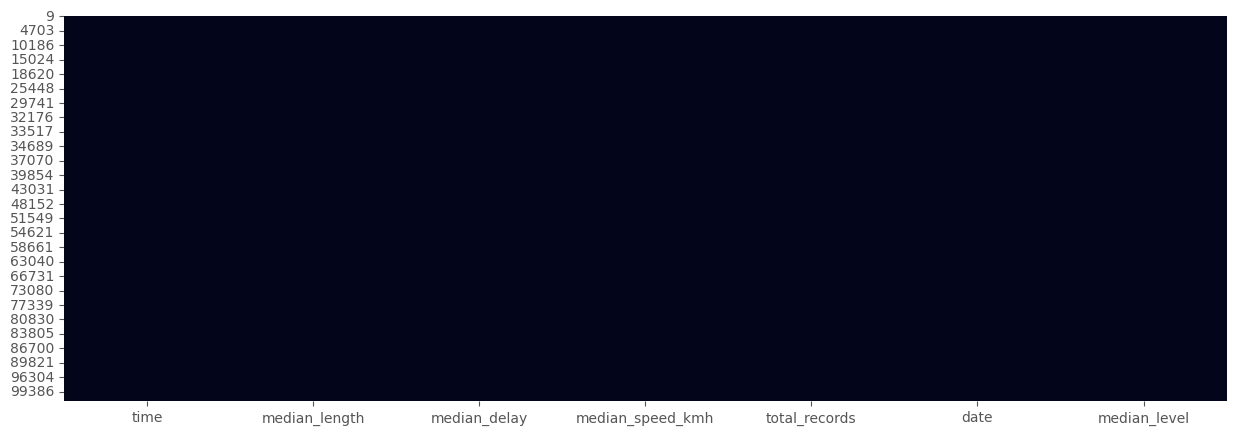

In [36]:
fig, ax = plt.subplots(figsize=(15,5))
sns.heatmap(df2.isna(),cbar=False,ax=ax)

In [37]:
df2.sample(10)

,time,median_length,median_delay,median_speed_kmh,total_records,date,median_level
83803,2022-08-26 04:00:00,3194.0,88.0,52.150,7,2022-08-26,1
14363,2022-07-15 17:00:00,5754.0,126.0,50.950,9,2022-07-15,1
70847,2022-08-17 10:00:00,456.0,106.0,10.040,4,2022-08-17,2
38947,2022-07-30 06:00:00,866.5,173.5,11.820,12,2022-07-30,3
67346,2022-08-14 20:00:00,3149.0,99.0,42.310,13,2022-08-14,1
4683,2022-07-09 00:00:00,1861.0,75.0,29.640,5,2022-07-09,2
63511,2022-08-13 03:00:00,1532.0,71.5,32.625,6,2022-08-13,2
86699,2022-08-27 14:00:00,1878.0,77.0,42.630,13,2022-08-27,2
51484,2022-08-05 23:00:00,826.0,166.0,14.690,9,2022-08-05,3
51425,2022-08-05 21:00:00,1544.0,75.0,37.790,8,2022-08-05,2


In [38]:
## change name column date to full_date

df2.rename({'date':'full_date'},axis=1, inplace=True)
df2

,time,median_length,median_delay,median_speed_kmh,total_records,full_date,median_level
9,2022-07-06 02:00:00,1368.0,97.5,30.665000,6,2022-07-06,2
11,2022-07-06 03:00:00,2927.0,121.0,30.620000,11,2022-07-06,2
12,2022-07-06 03:00:00,3098.0,71.0,53.960000,7,2022-07-06,1
14,2022-07-06 04:00:00,2927.0,115.0,31.380000,1,2022-07-06,2
188,2022-07-06 09:00:00,1333.0,45.0,29.450000,2,2022-07-06,2
...,...,...,...,...,...,...,...
101444,2022-09-04 15:00:00,1532.0,121.0,26.130000,17,2022-09-04,3
101445,2022-09-04 15:00:00,1532.0,90.0,30.460000,9,2022-09-04,2
101446,2022-09-04 15:00:00,5754.0,159.0,47.080000,2,2022-09-04,1
102317,2022-09-06 00:00:00,3377.0,116.0,39.030000,1,2022-09-06,2


In [39]:
from datetime import datetime

In [40]:
df2['day'] = df2['full_date'].dt.strftime("%A")
df2['date'] = df2['full_date'].dt.strftime("%d")
# name_of_week = df['date'].dt.dayofweek


In [41]:
# df.drop(columns=['name_of_week','nameofweek'], inplace = True)
# df

In [42]:
range = df2['full_date'].dt.dayofweek

name_of_week = []
for value in range:
    if value < 5 :
        name_of_week.append("Weekday")
    else :
        name_of_week.append("Weekend")

df2['name_of_week'] = name_of_week
df2

,time,median_length,median_delay,median_speed_kmh,total_records,full_date,median_level,day,date,name_of_week
9,2022-07-06 02:00:00,1368.0,97.5,30.665000,6,2022-07-06,2,Wednesday,06,Weekday
11,2022-07-06 03:00:00,2927.0,121.0,30.620000,11,2022-07-06,2,Wednesday,06,Weekday
12,2022-07-06 03:00:00,3098.0,71.0,53.960000,7,2022-07-06,1,Wednesday,06,Weekday
14,2022-07-06 04:00:00,2927.0,115.0,31.380000,1,2022-07-06,2,Wednesday,06,Weekday
188,2022-07-06 09:00:00,1333.0,45.0,29.450000,2,2022-07-06,2,Wednesday,06,Weekday
...,...,...,...,...,...,...,...,...,...,...
101444,2022-09-04 15:00:00,1532.0,121.0,26.130000,17,2022-09-04,3,Sunday,04,Weekend
101445,2022-09-04 15:00:00,1532.0,90.0,30.460000,9,2022-09-04,2,Sunday,04,Weekend
101446,2022-09-04 15:00:00,5754.0,159.0,47.080000,2,2022-09-04,1,Sunday,04,Weekend
102317,2022-09-06 00:00:00,3377.0,116.0,39.030000,1,2022-09-06,2,Tuesday,06,Weekday


In [43]:
##change columns position

df2 = df2[['time','median_length','median_delay','median_speed_kmh','total_records','full_date','date','day','name_of_week','median_level']]
df2

,time,median_length,median_delay,median_speed_kmh,total_records,full_date,date,day,name_of_week,median_level
9,2022-07-06 02:00:00,1368.0,97.5,30.665000,6,2022-07-06,06,Wednesday,Weekday,2
11,2022-07-06 03:00:00,2927.0,121.0,30.620000,11,2022-07-06,06,Wednesday,Weekday,2
12,2022-07-06 03:00:00,3098.0,71.0,53.960000,7,2022-07-06,06,Wednesday,Weekday,1
14,2022-07-06 04:00:00,2927.0,115.0,31.380000,1,2022-07-06,06,Wednesday,Weekday,2
188,2022-07-06 09:00:00,1333.0,45.0,29.450000,2,2022-07-06,06,Wednesday,Weekday,2
...,...,...,...,...,...,...,...,...,...,...
101444,2022-09-04 15:00:00,1532.0,121.0,26.130000,17,2022-09-04,04,Sunday,Weekend,3
101445,2022-09-04 15:00:00,1532.0,90.0,30.460000,9,2022-09-04,04,Sunday,Weekend,2
101446,2022-09-04 15:00:00,5754.0,159.0,47.080000,2,2022-09-04,04,Sunday,Weekend,1
102317,2022-09-06 00:00:00,3377.0,116.0,39.030000,1,2022-09-06,06,Tuesday,Weekday,2


**cheking unique values**

In [44]:
count_level_values = df2['median_level'].nunique()
level_values = df2['median_level'].unique()

count_date_values = df2['date'].nunique()
date_values = df2['date'].unique()

count_total_records= df2['total_records'].nunique()
records_values = df2['total_records'].unique()

count_day_values = df2['day'].nunique()
day_values = df2['day'].unique()

print ('count_level_values:', count_level_values, '\nlevel_values:',level_values,'\n\ncount_total_records:', count_total_records,'\nrecord values',records_values, '\n\ncount_date_values:', count_date_values,
      '\ndate_values:',date_values, '\n\ncount_day_values:', count_day_values,'\nday_values:',day_values )


count_level_values: 4 
level_values: [2 1 3 4] 

count_total_records: 41 
record values [ 6 11  7  1  2  5 10  8  3  4 12 17 16 19  9 20 31 43 14 25 15 26 21 24
 13 35 23 18 34 29 22 36 38 27 30 39 51 47 41 50 33] 

count_date_values: 31 
date_values: ['06' '07' '08' '09' '10' '12' '13' '14' '15' '16' '17' '18' '19' '20'
 '22' '23' '24' '25' '26' '27' '28' '29' '30' '31' '01' '02' '03' '04'
 '05' '11' '21'] 

count_day_values: 7 
day_values: ['Wednesday' 'Thursday' 'Friday' 'Saturday' 'Sunday' 'Tuesday' 'Monday']


### Visualisasi matrix data

In [45]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 587 entries, 9 to 102321
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   time              587 non-null    datetime64[ns]
 1   median_length     587 non-null    float64       
 2   median_delay      587 non-null    float64       
 3   median_speed_kmh  587 non-null    float64       
 4   total_records     587 non-null    int32         
 5   full_date         587 non-null    datetime64[ns]
 6   date              587 non-null    object        
 7   day               587 non-null    object        
 8   name_of_week      587 non-null    object        
 9   median_level      587 non-null    int32         
dtypes: datetime64[ns](2), float64(3), int32(2), object(3)
memory usage: 45.9+ KB


<Figure size 800x400 with 0 Axes>

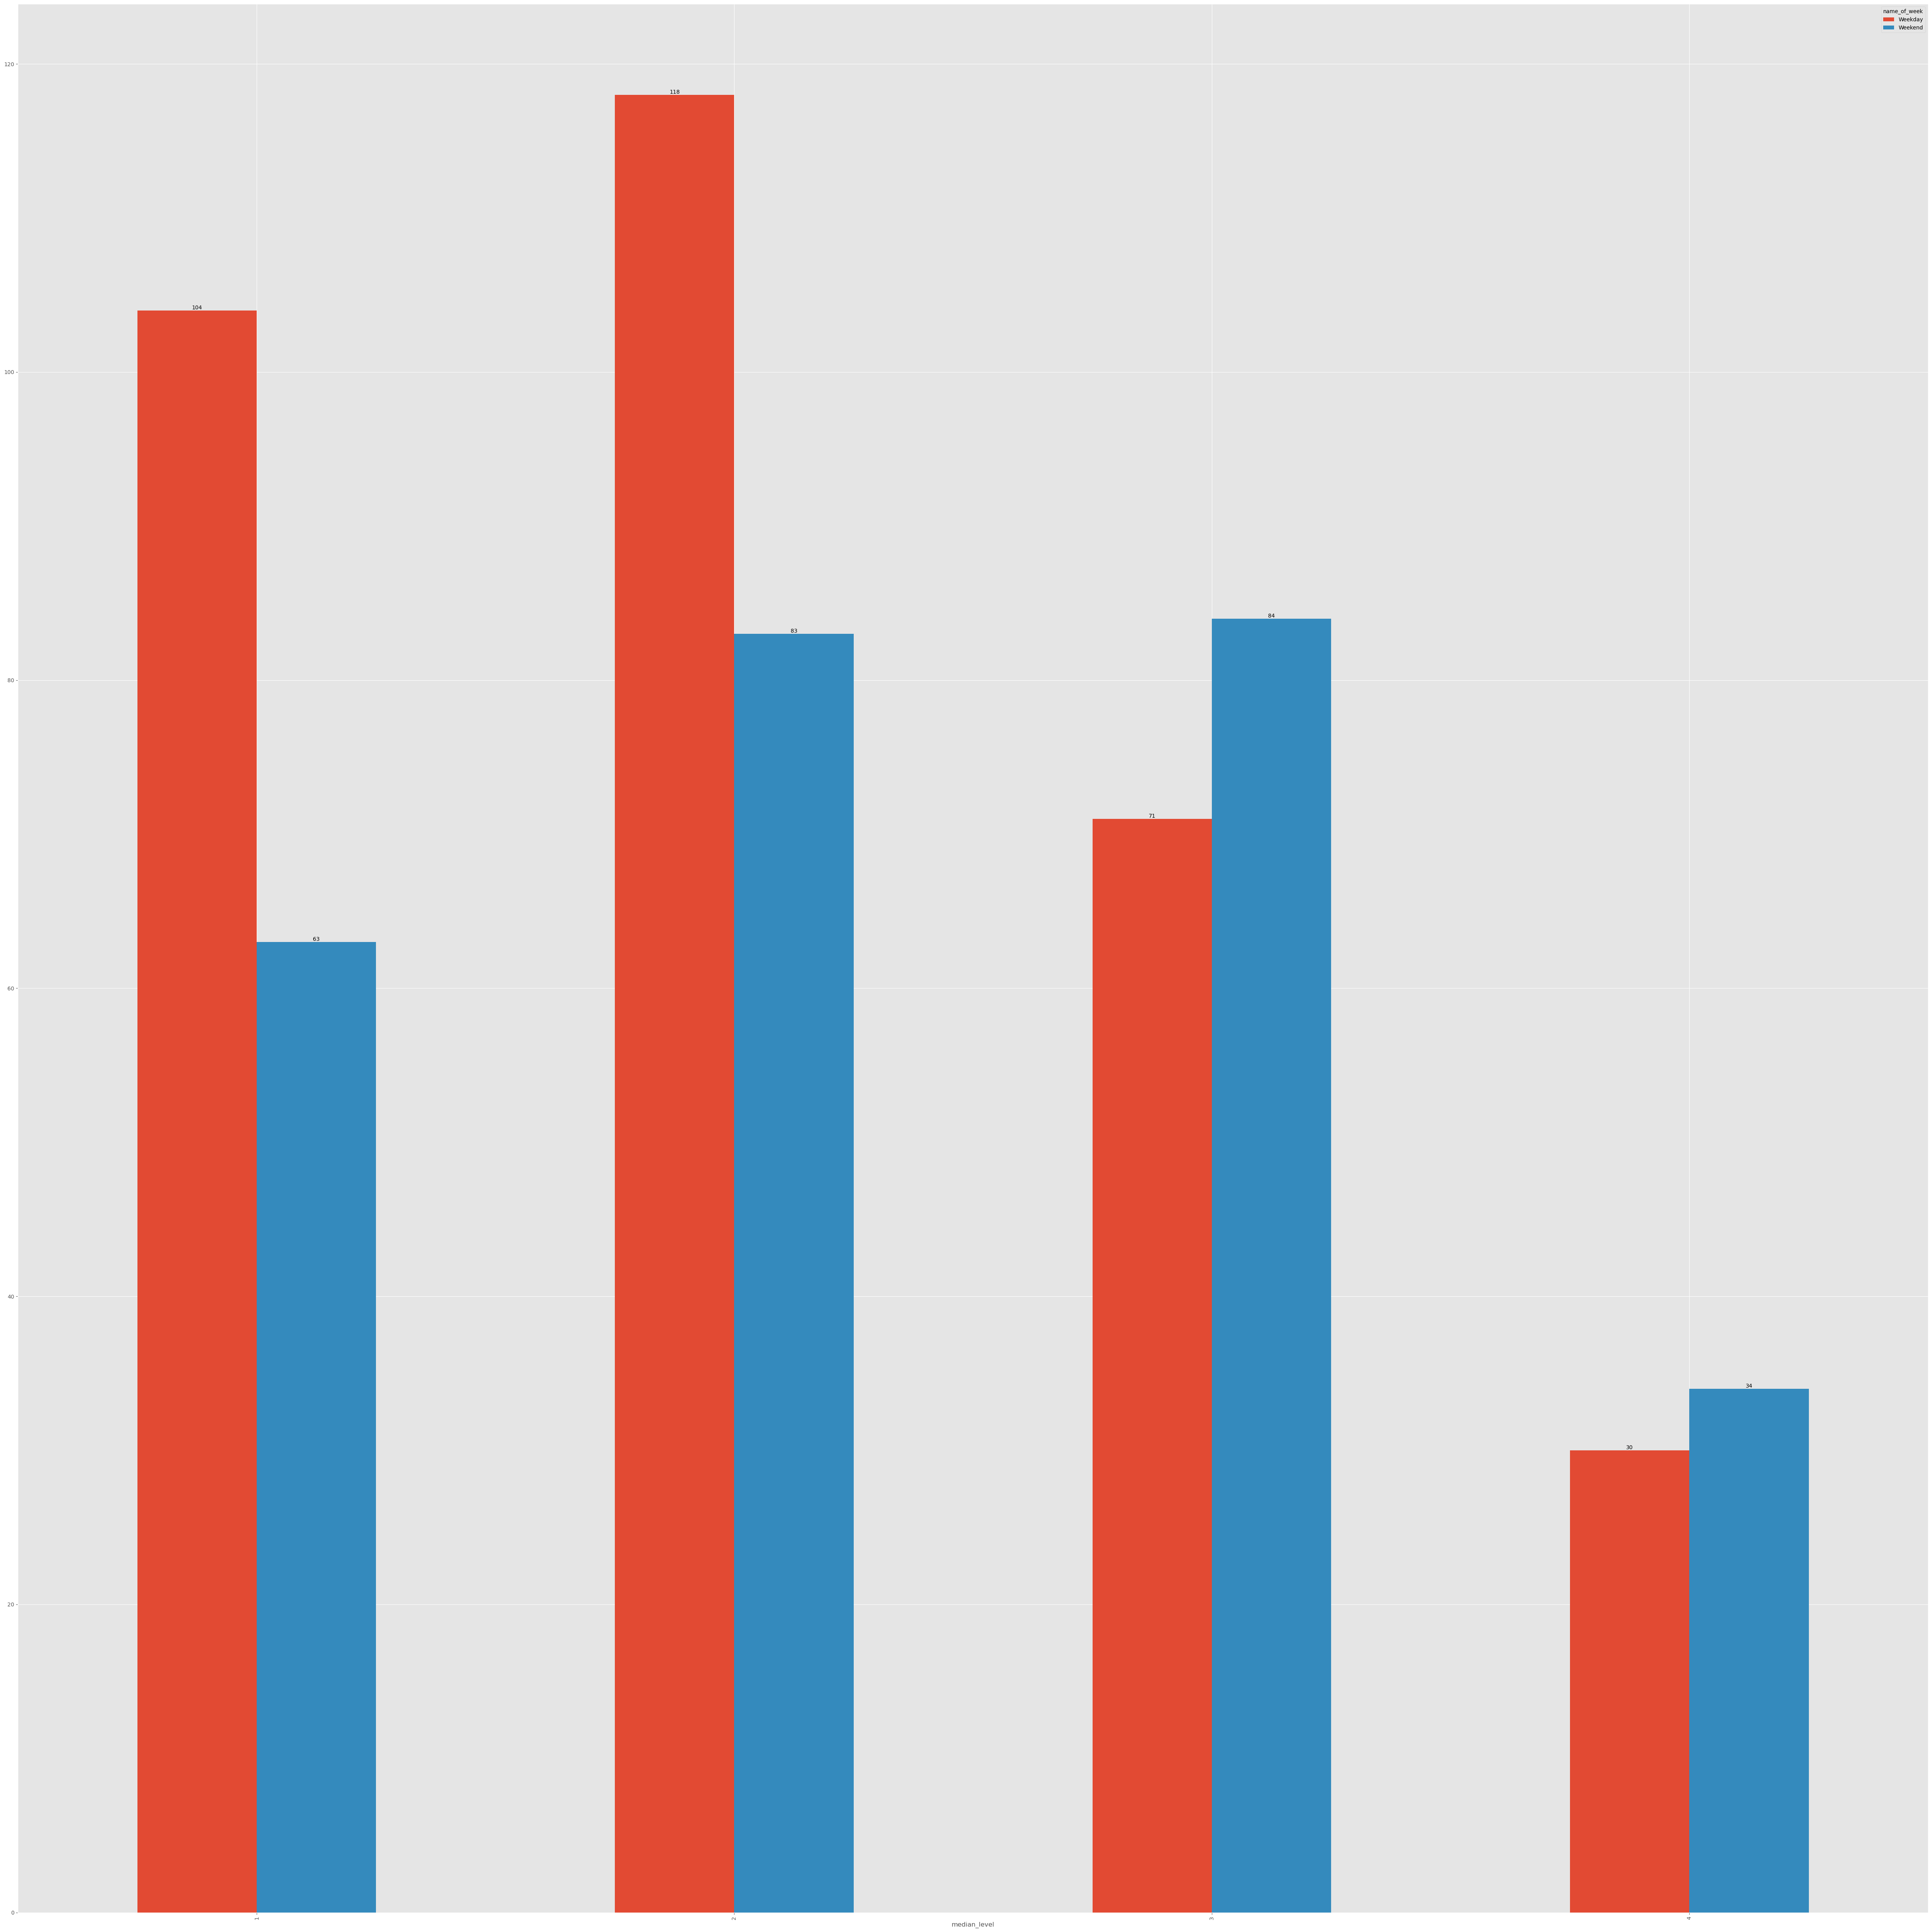

In [46]:
plt.figure(figsize=(8,4))
ax = df2.groupby('name_of_week').median_level.value_counts().sort_values(ascending=False).unstack(0).plot.bar()

# SMALL_SIZE = 20
# MEDIUM_SIZE = 30
# BIGGER_SIZE = 35

# plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
# plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
# plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
# plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
# plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
# plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
# plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


for i in ax.containers:
    ax.bar_label(i,)
    
plt.tight_layout()

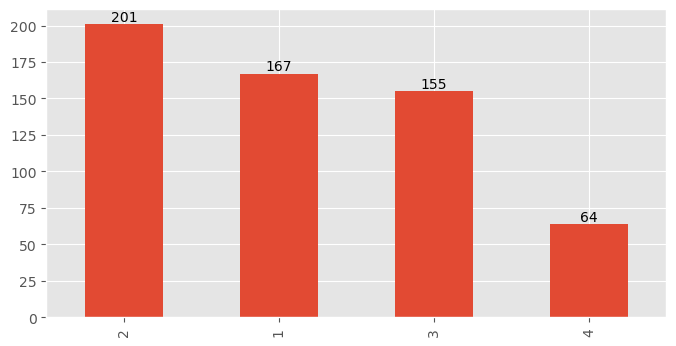

In [47]:
plt.figure(figsize=(8,4))
ax = df2['median_level'].value_counts().sort_values(ascending=False).plot(kind ='bar')
# ax = sns.barplot(df['median_level'].value_counts().sort_values(ascending=False))
for i in ax.containers:
    ax.bar_label(i,)

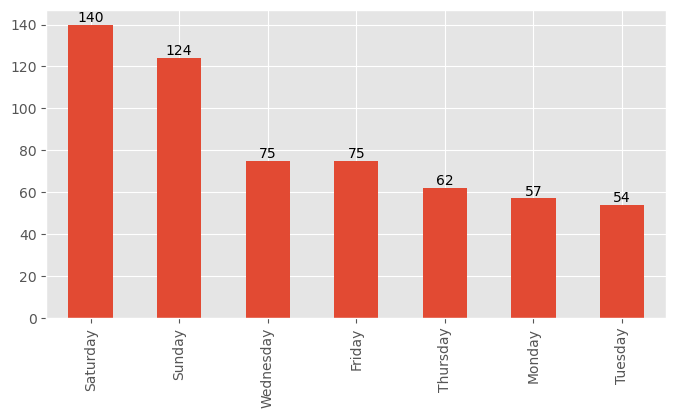

In [48]:
plt.figure(figsize=(8,4))
ax = df2['day'].value_counts().sort_values(ascending=False).plot(kind ='bar')
# ax = sns.barplot(df['median_level'].value_counts().sort_values(ascending=False))
for i in ax.containers:
    ax.bar_label(i,)

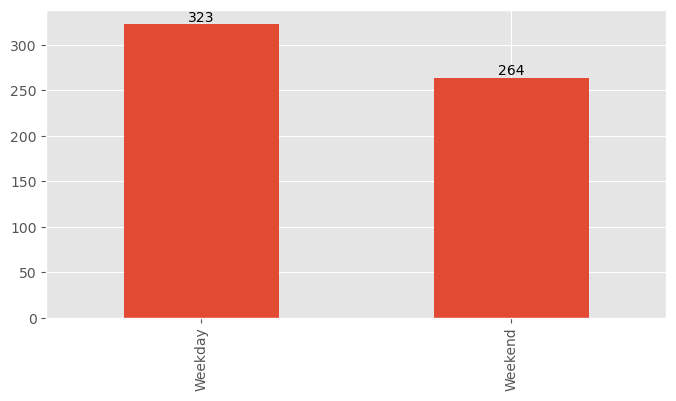

In [49]:
plt.figure(figsize=(8,4))
ax = df2['name_of_week'].value_counts().sort_values(ascending=False).plot(kind ='bar')
# ax = sns.barplot(df['median_level'].value_counts().sort_values(ascending=False))
for i in ax.containers:
    ax.bar_label(i,)

In [50]:
day_dict = dict(df2['day'].value_counts())
day_dict 

{'Saturday': 140,
 'Sunday': 124,
 'Wednesday': 75,
 'Friday': 75,
 'Thursday': 62,
 'Monday': 57,
 'Tuesday': 54}

<AxesSubplot:xlabel='median_level', ylabel='median_length'>

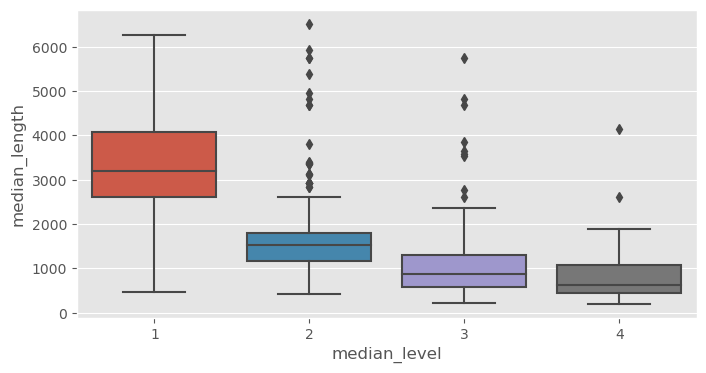

In [51]:
plt.figure(figsize=(8,4))
sns.boxplot(data=df2, x="median_level", y="median_length")

<AxesSubplot:xlabel='median_level', ylabel='median_delay'>

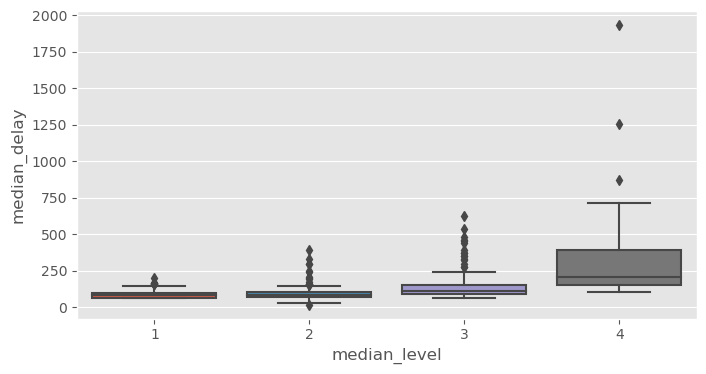

In [52]:
plt.figure(figsize=(8,4))
sns.boxplot(data=df2, x="median_level", y="median_delay")

<AxesSubplot:xlabel='median_level', ylabel='median_speed_kmh'>

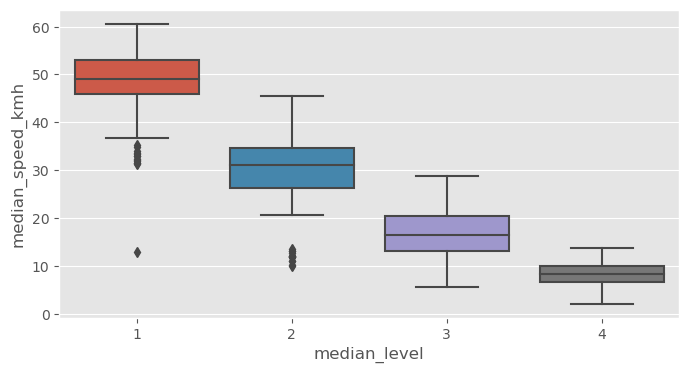

In [53]:
plt.figure(figsize=(8,4))
sns.boxplot(data=df2, x="median_level", y="median_speed_kmh")

<AxesSubplot:xlabel='day', ylabel='median_level'>

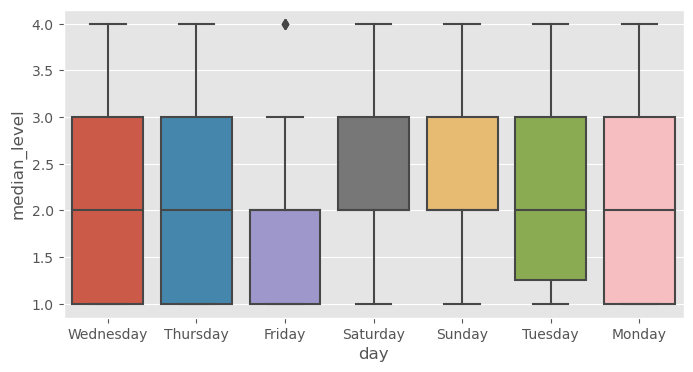

In [54]:
plt.figure(figsize=(8,4))
sns.boxplot(data=df2, x="day", y="median_level")

<AxesSubplot:xlabel='day', ylabel='median_level'>

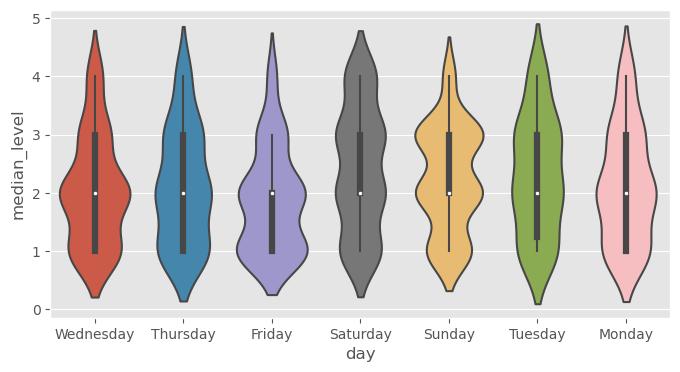

In [55]:
plt.figure(figsize=(8,4))
sns.violinplot(data=df2, x="day", y="median_level", split=True)

Text(40.58879974440586, 0.5, 'median_delay (s)')

<Figure size 800x400 with 0 Axes>

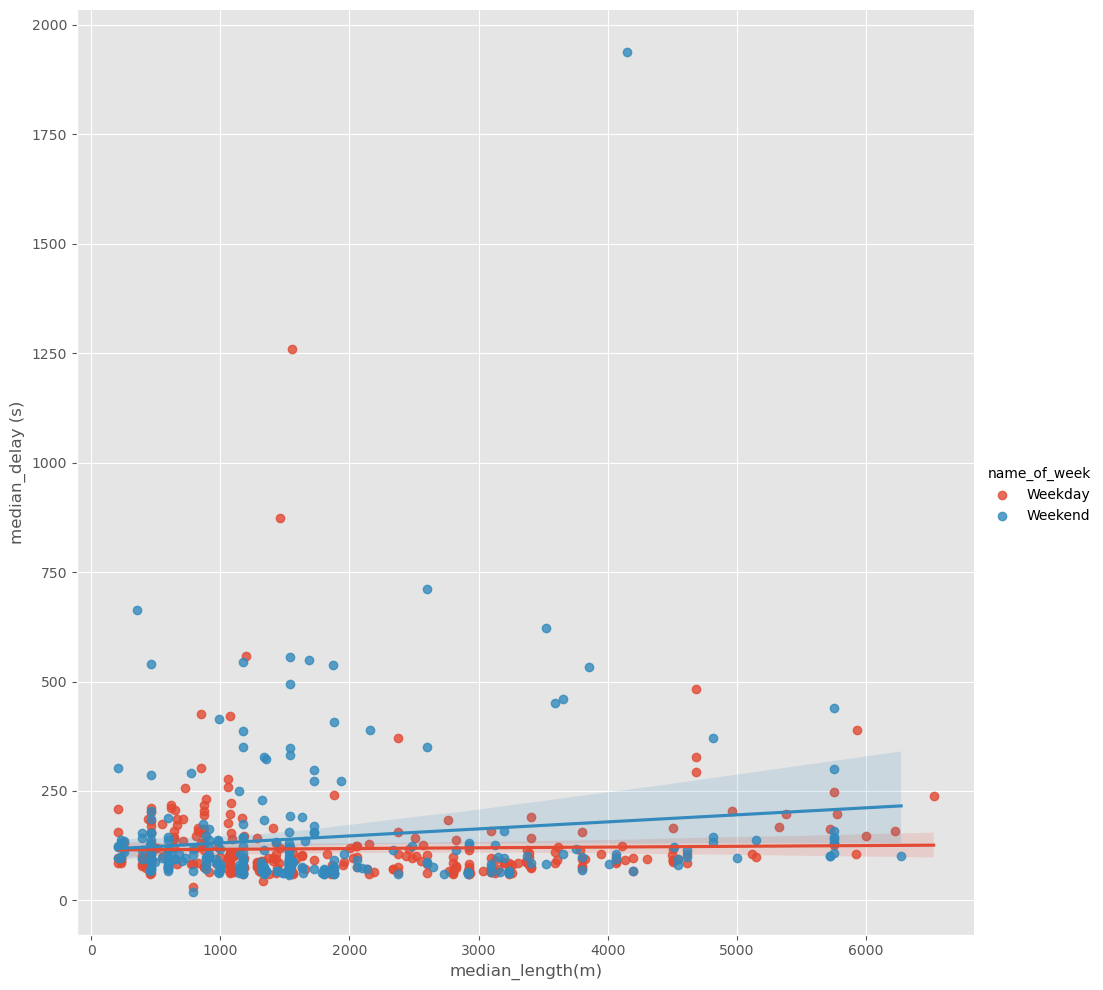

In [56]:
plt.figure(figsize=(8,4))
sns.lmplot(x="median_length", 
           y="median_delay", 
           hue="name_of_week",
           data=df2,
           height=10)
plt.xlabel("median_length(m)")
plt.ylabel("median_delay (s)")
# plt.savefig("How_To_Add_Regression_Line_per_group_Seaborn.png",
#                     format='png',dpi=150)

Text(38.55667127218364, 0.5, 'total_records')

<Figure size 800x400 with 0 Axes>

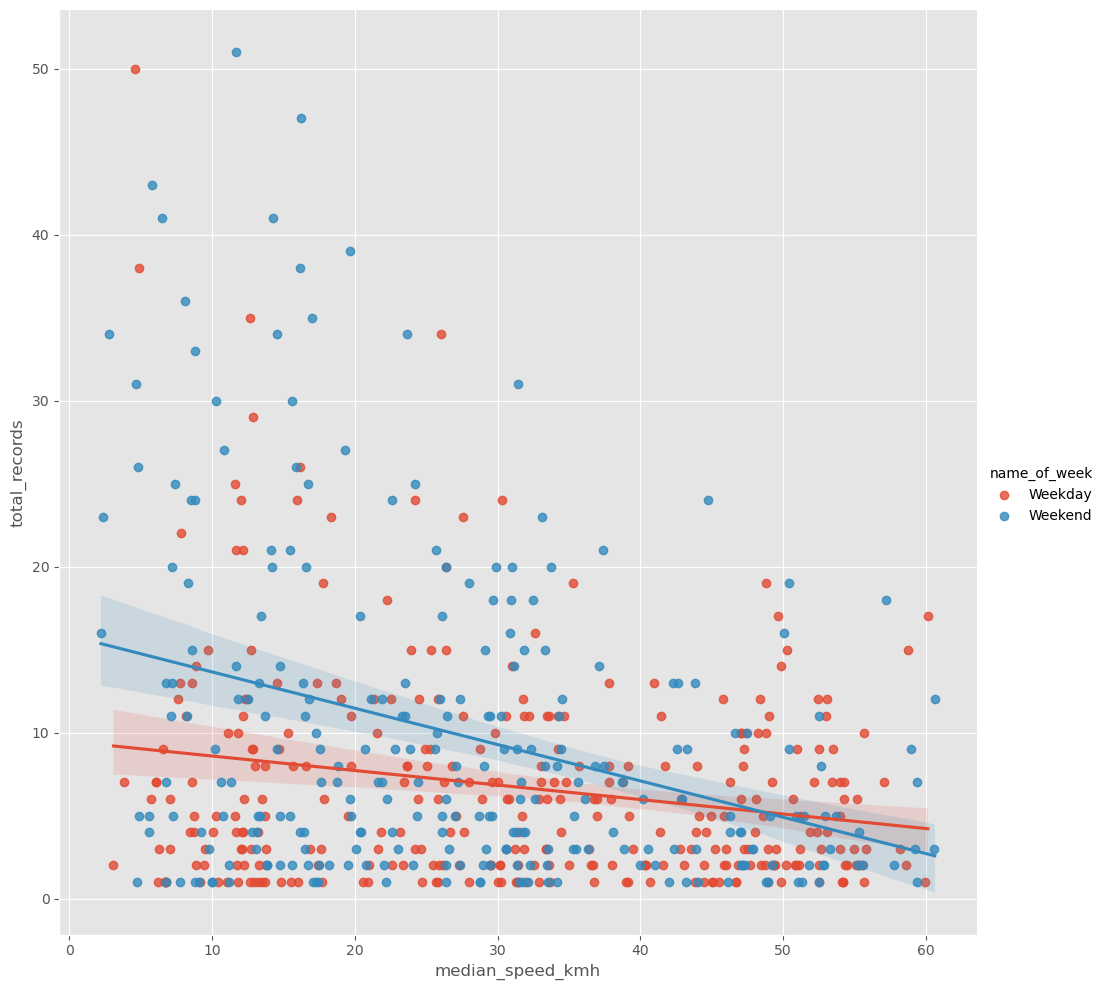

In [57]:
plt.figure(figsize=(8,4))
sns.lmplot(x="median_speed_kmh", 
           y="total_records", 
           hue="name_of_week",
           data=df2,
           height=10)
plt.xlabel("median_speed_kmh")
plt.ylabel("total_records")

### Data cleansing

In [58]:
## define a function called "plot_boxplot"


def plot_boxplot(df,ft):
    plt.figure(figsize=(7,5))
    df.boxplot(column=[ft],color='blue')
    plt.grid(True)
    plt.show()

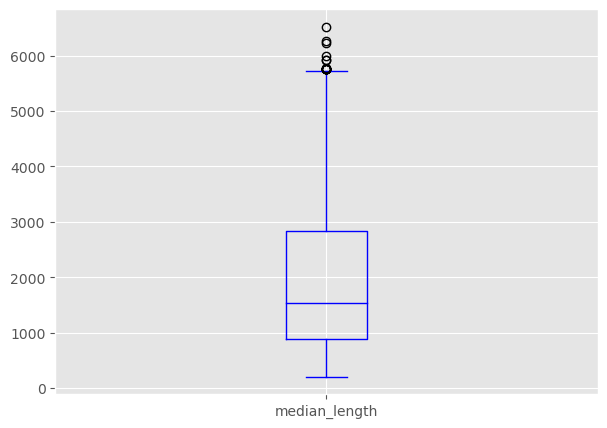

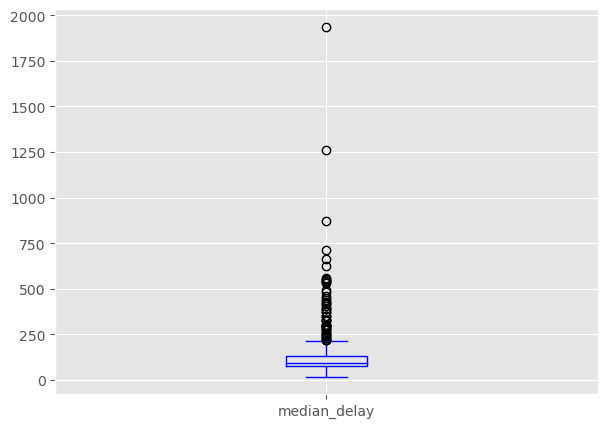

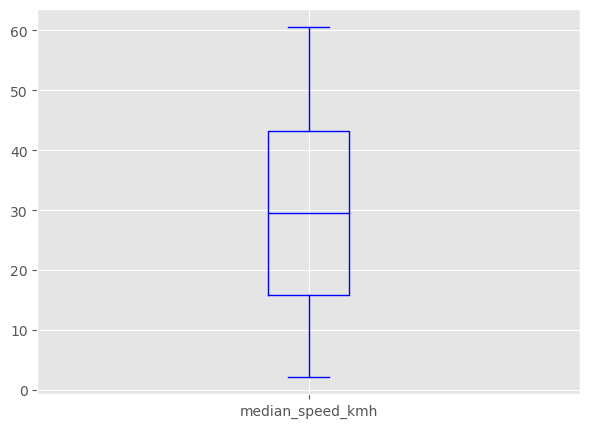

In [59]:
plot_boxplot(df2,"median_length")
plot_boxplot(df2,"median_delay")
plot_boxplot(df2,"median_speed_kmh")

In [60]:
df2.head()

,time,median_length,median_delay,median_speed_kmh,total_records,full_date,date,day,name_of_week,median_level
9,2022-07-06 02:00:00,1368.0,97.5,30.665,6,2022-07-06,06,Wednesday,Weekday,2
11,2022-07-06 03:00:00,2927.0,121.0,30.620,11,2022-07-06,06,Wednesday,Weekday,2
12,2022-07-06 03:00:00,3098.0,71.0,53.960,7,2022-07-06,06,Wednesday,Weekday,1
14,2022-07-06 04:00:00,2927.0,115.0,31.380,1,2022-07-06,06,Wednesday,Weekday,2
188,2022-07-06 09:00:00,1333.0,45.0,29.450,2,2022-07-06,06,Wednesday,Weekday,2


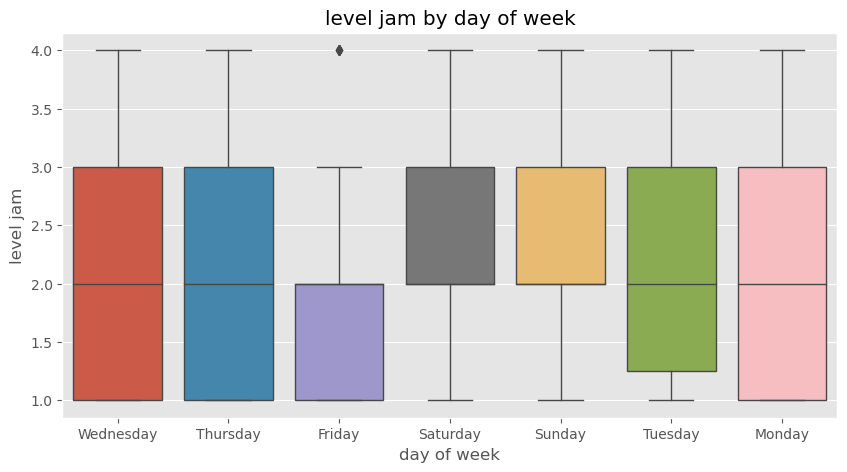

In [61]:
fig, ax = plt.subplots(figsize=(10,5))
sns.boxplot(data=df2,
           x='day',
            y='median_level',
            ax=ax,
            linewidth=1)
ax.set_title('level jam by day of week')
ax.set_xlabel('day of week')
ax.set_ylabel('level jam')
#ax.legend(bbox_to_anchor=(1,1))
plt.show()

**Drop outlier from boxplot**

In [62]:
## define a function for quartil

def outlier(df,ft):
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR = Q3-Q1
    
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    
    ls = df.index[(df[ft] < lower_bound) | (df[ft] > upper_bound)]
    return ls

In [63]:
## create an empaty list to stode the output indices from multiple columns

index_list = []

for feature in ['median_length','median_delay','median_speed_kmh']:
    index_list.extend(outlier(df2,feature))

In [64]:
index_list

[2294,
 11763,
 14283,
 14363,
 15077,
 48025,
 49793,
 52616,
 54776,
 66439,
 71672,
 88918,
 88975,
 96302,
 96304,
 101276,
 101446,
 2294,
 9448,
 23477,
 27957,
 30587,
 32519,
 33947,
 34008,
 34032,
 35144,
 37069,
 37070,
 38948,
 38993,
 38994,
 39029,
 39192,
 39193,
 39201,
 39202,
 42031,
 42186,
 42187,
 42298,
 42501,
 48142,
 48152,
 49793,
 51548,
 51549,
 51623,
 51639,
 51754,
 51785,
 52816,
 52829,
 63669,
 64381,
 78725,
 78726,
 82359,
 83748,
 83762,
 83779,
 83780,
 85635,
 85636,
 88918,
 88919,
 88975,
 96304,
 98111,
 98213,
 99178,
 99179]

In [65]:
def remove(df,ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df

In [66]:
df3 = remove(df2,index_list)

In [67]:
df3.shape

(520, 10)

In [68]:
df2.shape

(587, 10)

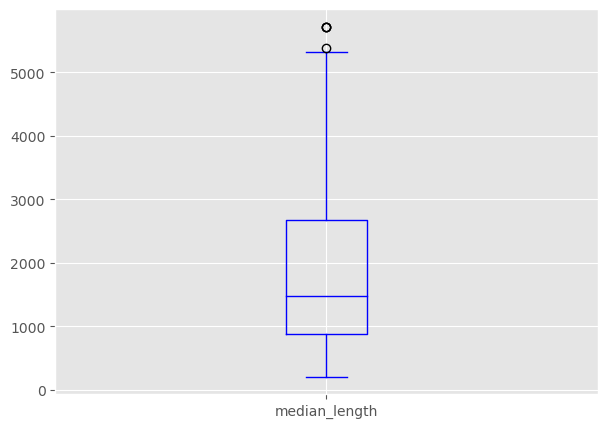

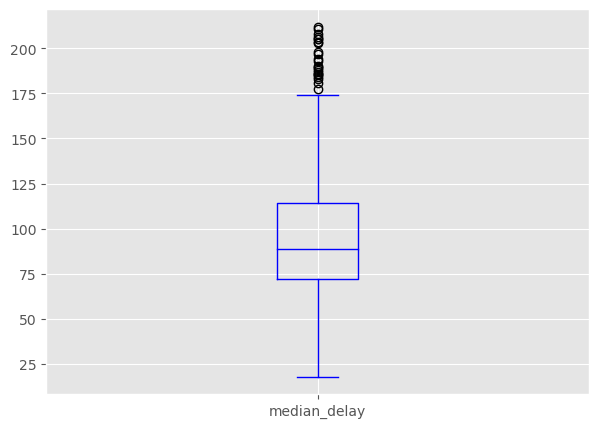

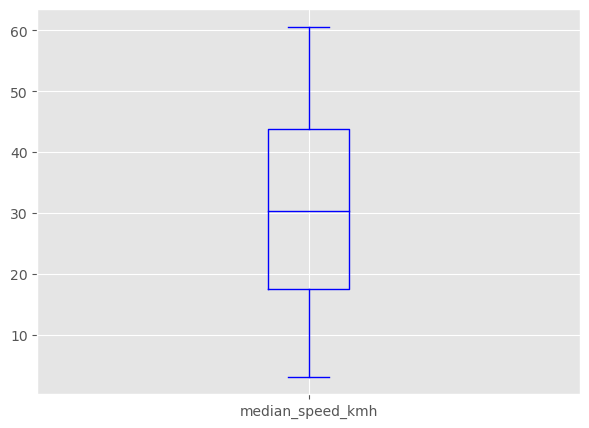

In [69]:
plot_boxplot(df3,"median_length")
plot_boxplot(df3,"median_delay")
plot_boxplot(df3,"median_speed_kmh")

<Figure size 800x600 with 0 Axes>

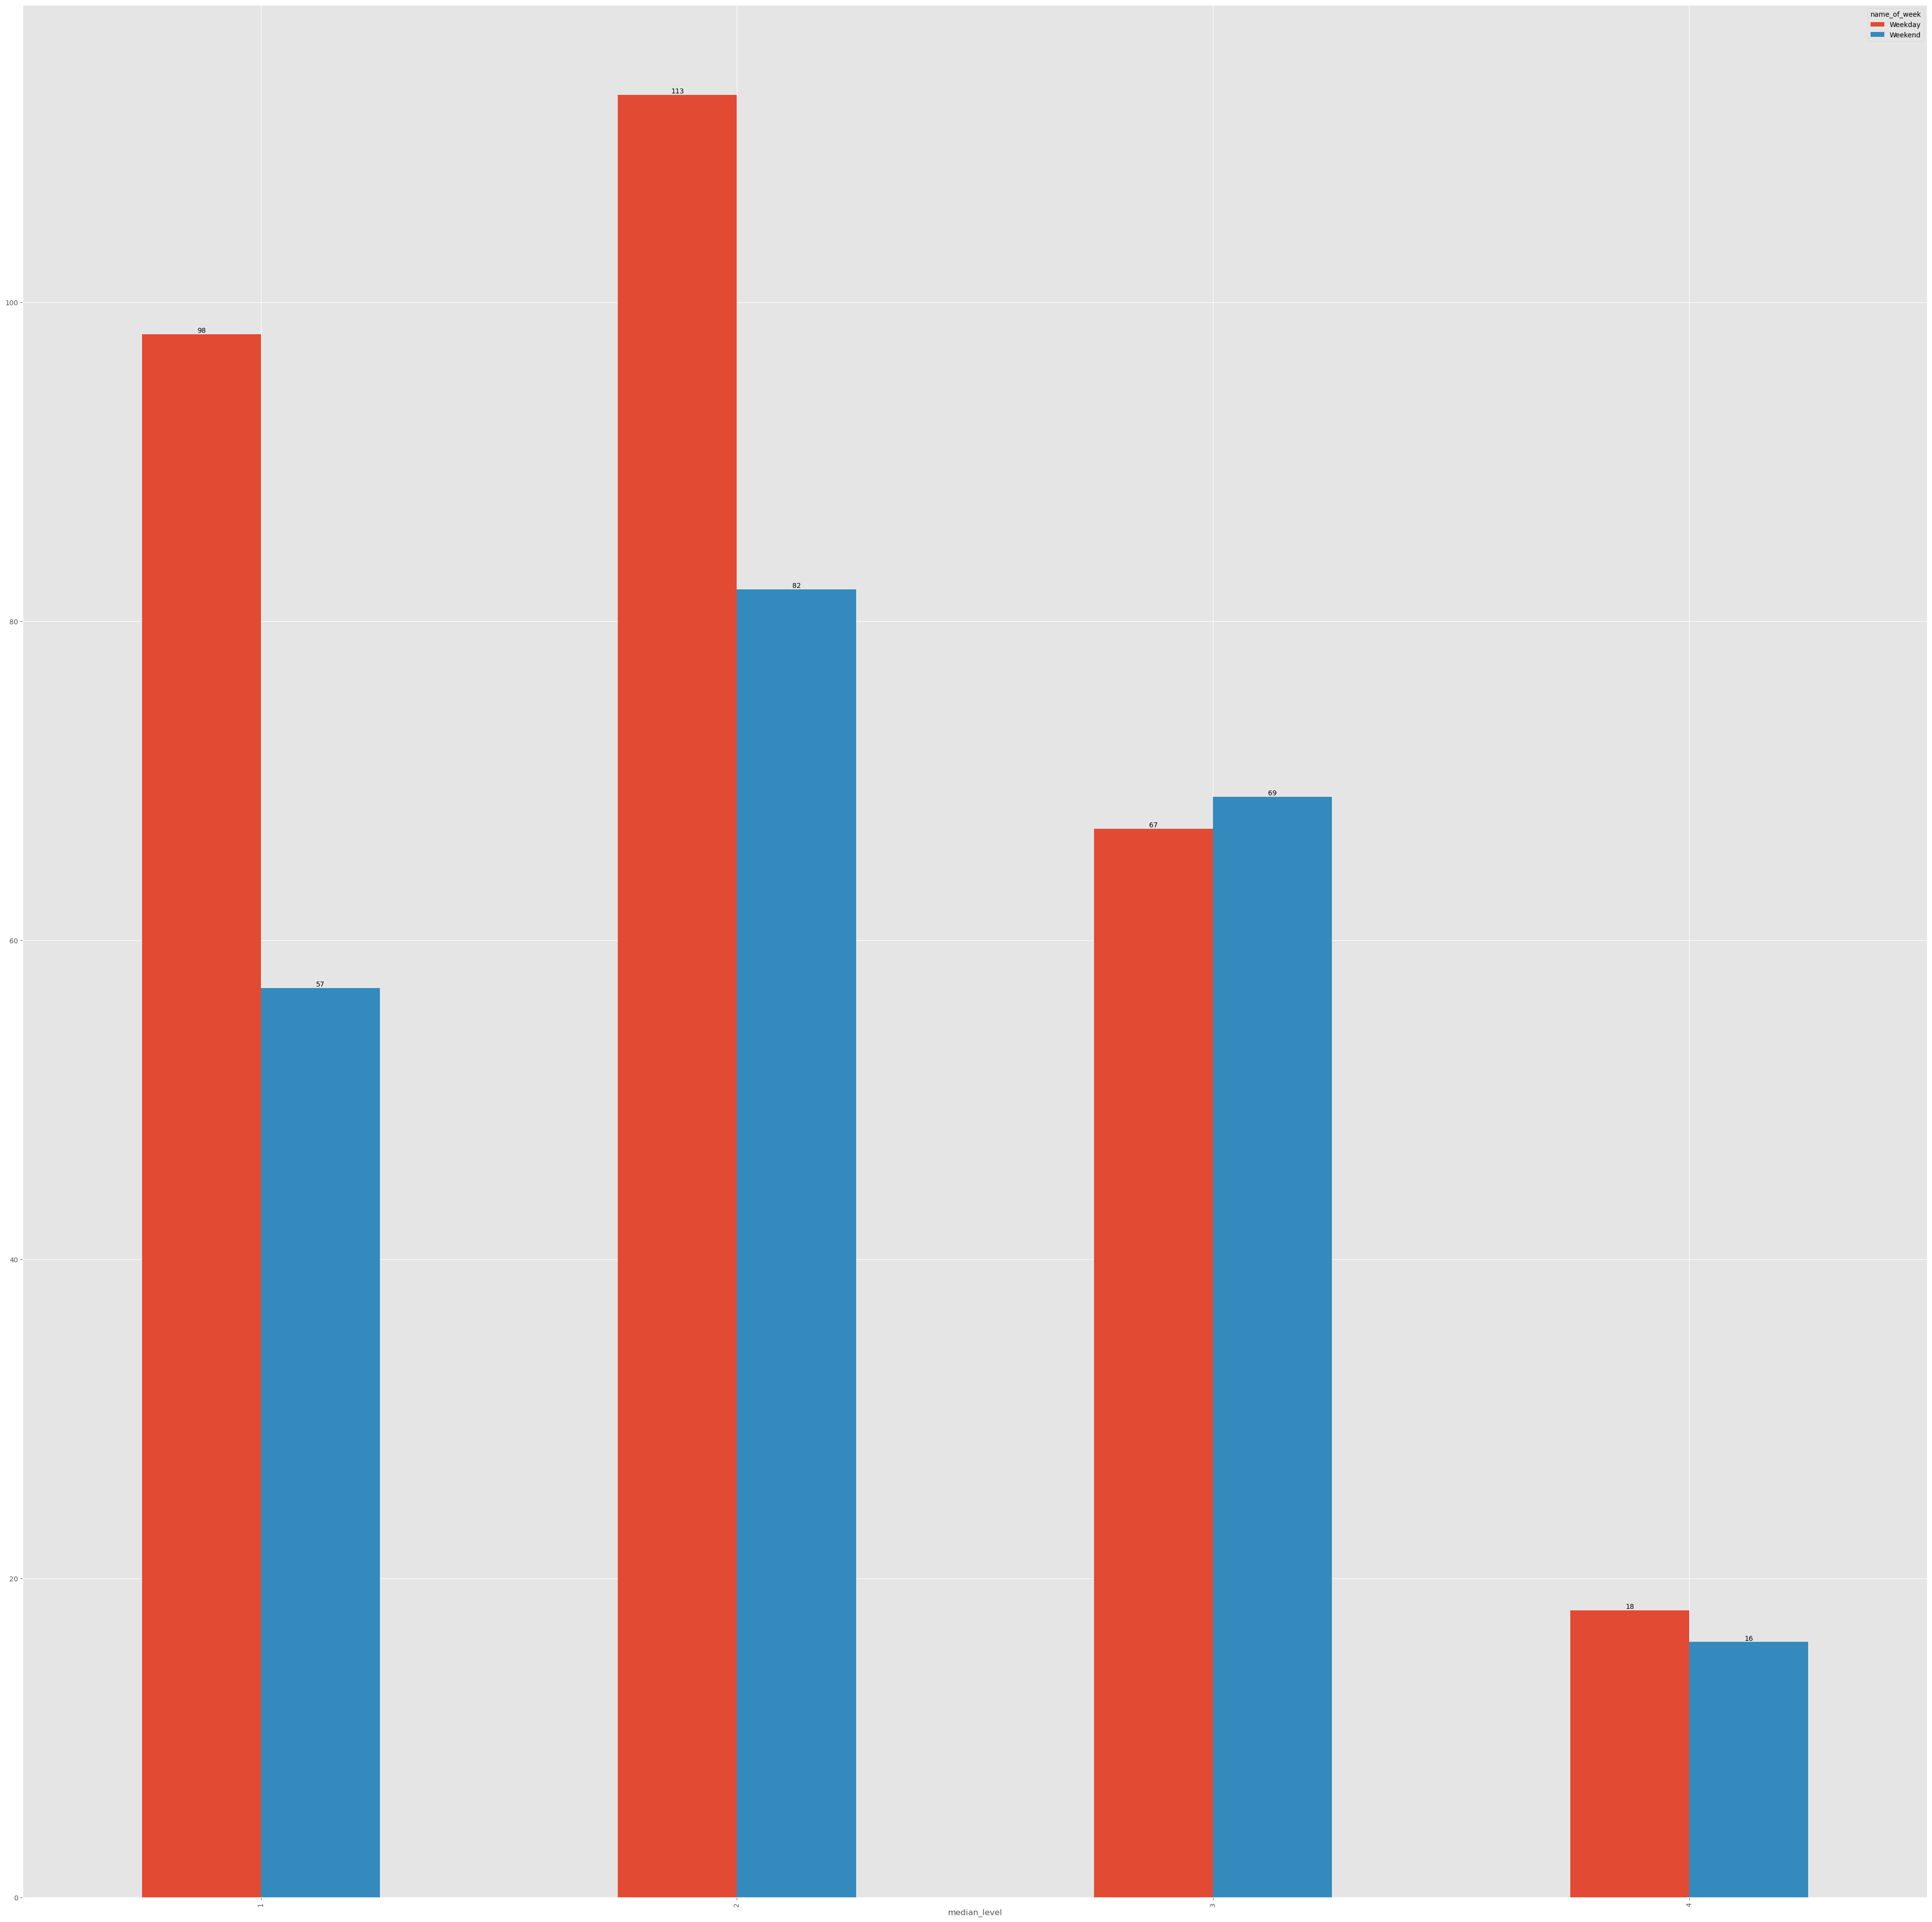

In [70]:
plt.figure(figsize=(8,6))
ax = df3.groupby('name_of_week').median_level.value_counts().sort_values(ascending=False).unstack(0).plot.bar()

SMALL_SIZE = 20
MEDIUM_SIZE = 30
BIGGER_SIZE = 35

# plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
# plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
# plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
# plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
# plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels/
# plt.ax('legend', fontsize=BIGGER_SIZE)    # legend fontsize
# plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


for i in ax.containers:
    ax.bar_label(i,)
    
# plt.tight_layout()

In [71]:
df3.sample(5)

,time,median_length,median_delay,median_speed_kmh,total_records,full_date,date,day,name_of_week,median_level
32517,2022-07-25 22:00:00,1659.0,72.0,37.830,7,2022-07-25,25,Monday,Weekday,2
90990,2022-08-29 17:00:00,4065.0,99.5,47.405,10,2022-08-29,29,Monday,Weekday,1
83763,2022-08-25 22:00:00,1115.0,106.0,25.830,1,2022-08-25,25,Thursday,Weekday,3
15308,2022-07-16 09:00:00,1631.0,189.5,20.365,4,2022-07-16,16,Saturday,Weekend,3
31688,2022-07-25 12:00:00,461.0,92.0,13.250,2,2022-07-25,25,Monday,Weekday,3


In [72]:
df3.name_of_week.unique()

array(['Weekday', 'Weekend'], dtype=object)

In [73]:
df3_copy = df3.copy()
df3_copy.time.duplicated().sum()

171

**duplicated time is so much :(( and the duplicated time has different level. So I will use the max level for duplicated time**

In [74]:
df3_copy = df3_copy.groupby(['time'])['median_level'].max().reset_index()
df3_copy.time.duplicated().sum()

0

In [75]:
print('min date:',df3_copy.time.min())
print('max date:',df3_copy.time.max())

min date: 2022-07-06 02:00:00
max date: 2022-09-06 00:00:00


In [76]:
df3_copy.shape

(349, 2)

In [77]:
print(80/100*349)

279.2


In [78]:
df3_copy.set_index('time',inplace=True)
df3_copy.sample(5)

,median_level
time,
2022-07-17 04:00:00,2
2022-07-15 20:00:00,2
2022-07-09 02:00:00,1
2022-08-21 13:00:00,3
2022-07-20 08:00:00,2


<AxesSubplot:xlabel='time'>

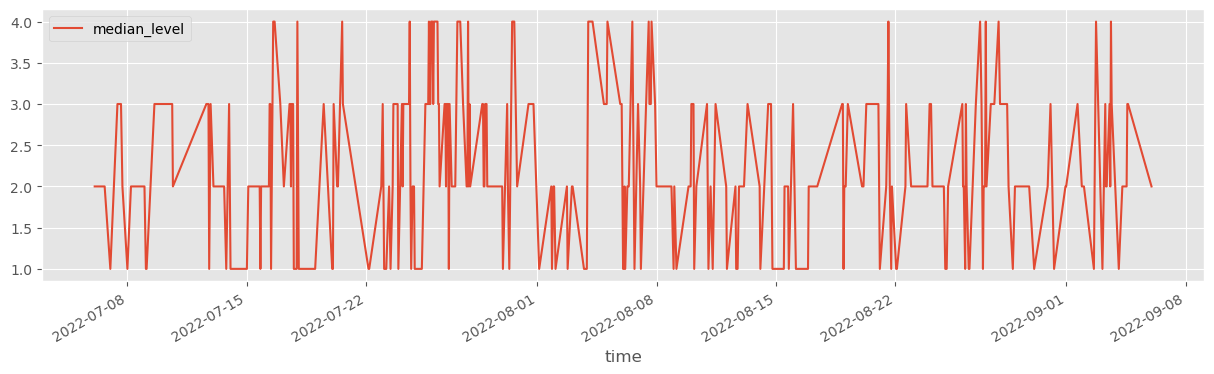

In [79]:
df3_copy.columns = ['median_level']
df3_copy.plot(figsize=(15,4))

In [80]:
df3_copy.shape

(349, 1)

### Time series Features

In [81]:
from pandas.api.types import CategoricalDtype

cat_type = CategoricalDtype(categories=['Monday','Tuesday',
                                       'Wednesday','Thursday',
                                       'Saturday','Sunday'],
                           ordered = True)

def create_features(df,label=None):
    ###Create time series features from datetime index
    df = df.copy()
    df['date'] = df.index
    df['hour'] = df['date'].dt.hour
    df['dayofweek'] = df['date'].dt.dayofweek
    df['weekday'] = df['date'].dt.day_name()
    df['weekday'] = df['weekday'].astype(cat_type)
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.weekofyear
    df['date_offset'] = (df.date.dt.month*100*df.date.dt.day -320)%1300
    
    x = df[['hour','dayofweek','quarter','month','year','dayofyear',
           'dayofmonth','weekofyear','weekday']]
    
    if label:
        y = df[label]
        return x,y
    return x

x,y = create_features(df3_copy, label='median_level')
feature_and_target = pd.concat([x,y], axis=1)

In [82]:
df3_copy.sample()

,median_level
time,
2022-07-16 08:00:00,3


In [83]:
feature_and_target.head()

,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,weekday,median_level
time,,,,,,,,,,
2022-07-06 02:00:00,2,2,3,7,2022,187,6,27,Wednesday,2
2022-07-06 03:00:00,3,2,3,7,2022,187,6,27,Wednesday,2
2022-07-06 04:00:00,4,2,3,7,2022,187,6,27,Wednesday,2
2022-07-06 09:00:00,9,2,3,7,2022,187,6,27,Wednesday,2
2022-07-06 14:00:00,14,2,3,7,2022,187,6,27,Wednesday,2


In [84]:
feature_and_target.shape

(349, 10)

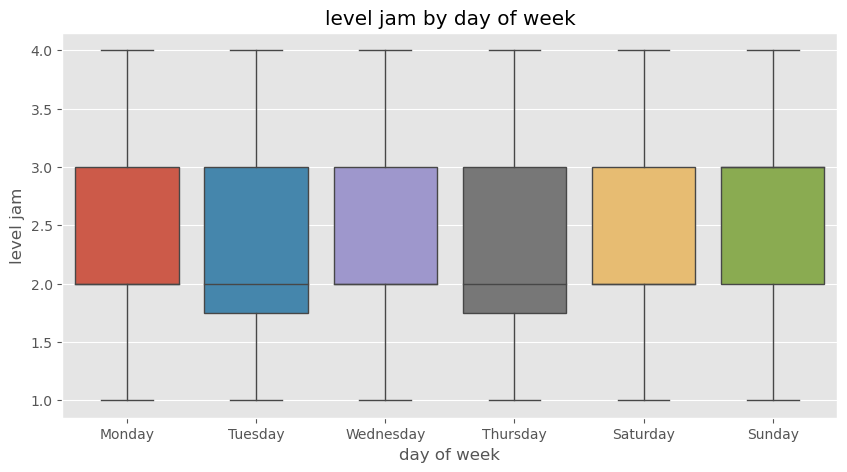

In [85]:
fig, ax = plt.subplots(figsize=(10,5))
sns.boxplot(data=feature_and_target,
           x='weekday',
            y='median_level',
            ax=ax,
            linewidth=1)
ax.set_title('level jam by day of week')
ax.set_xlabel('day of week')
ax.set_ylabel('level jam')
#ax.legend(bbox_to_anchor=(1,1))
plt.show()

### Train/Test Split

In [86]:
### I want to split 80% data for data train

print((80/100*349))

### iloc 0-279 for data train

279.2


In [87]:
df3_copy.shape

(349, 1)

In [88]:
df3_copy.sample()

,median_level
time,
2022-07-25 15:00:00,3


In [89]:
level_train = df3_copy.iloc[0:280].copy()
level_test = df3_copy.iloc[280:].copy()

print(level_train.shape)
print(level_test.shape)
level_test.head()

(280, 1)
(69, 1)


,median_level
time,
2022-08-24 00:00:00,3
2022-08-24 02:00:00,3
2022-08-24 04:00:00,2
2022-08-24 18:00:00,2
2022-08-24 19:00:00,2


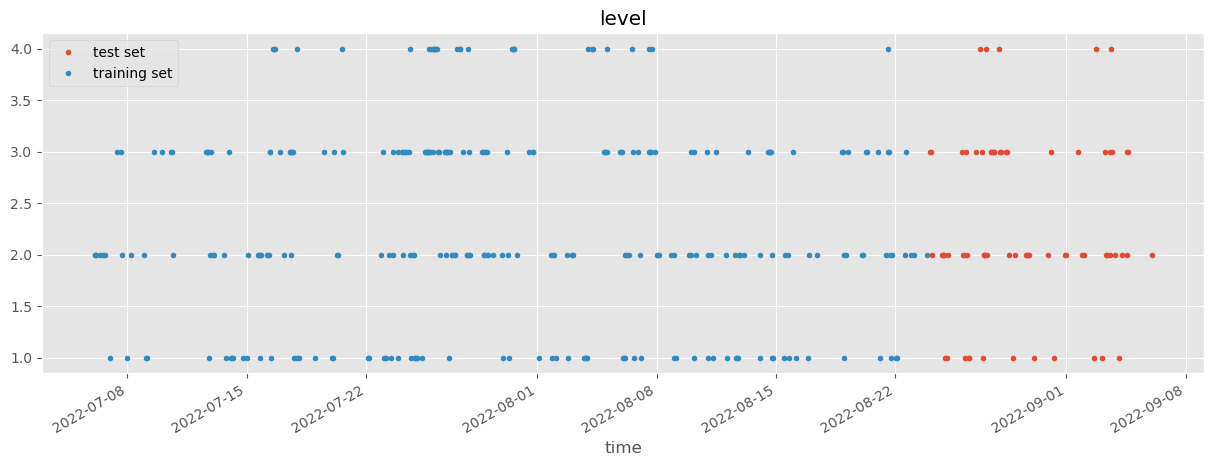

In [90]:
level_train = df3_copy.iloc[0:280].copy()
level_test = df3_copy.iloc[280:].copy()

# Plot train and test so we can see where we hace split
level_test \
    .rename(columns={'median_level':'test set'}) \
    .join(level_train.rename(columns={'median_level':'training set'}),
         how='outer')\
    .plot(figsize=(15,5), title='level',style='.')
plt.show()

### Simple Prophet Model

<ul>Prophet model expect the dataset to be named a spesific way. We will rename our dataframe columns before feeding it into the model
    <li>Datetime column named = ds</li>
     <li>target = y</li>
    
</ul>

In [91]:
level_train_prophet = level_train.reset_index() \
    .rename(columns={'time':'ds','median_level':'y'})

In [92]:
level_train_prophet.head()

,ds,y
0,2022-07-06 02:00:00,2
1,2022-07-06 03:00:00,2
2,2022-07-06 04:00:00,2
3,2022-07-06 09:00:00,2
4,2022-07-06 14:00:00,2


In [93]:
# pip install fbprophet (fail)

# !pip install yfinance prophet pyspark

#pip install prophet (fail)

In [94]:
# check prophet version
# import fbprophet
# print version number
from prophet import Prophet

# from prophet import Prophet


# print('Prophet %s' % Prophet.__version__)

In [95]:
%%time
model = Prophet()
model.fit(level_train_prophet)

23:33:05 - cmdstanpy - INFO - Chain [1] start processing
23:33:06 - cmdstanpy - INFO - Chain [1] done processing


Wall time: 2.35 s


In [96]:
## Predict on test set with model
level_test_prophet = level_test.reset_index() \
    .rename(columns={'time':'ds','median_level':'y'})
                                           
level_test_fcst = model.predict(level_test_prophet)

In [97]:
level_test_fcst.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-08-24 00:00:00,2.333592,1.293673,3.293554,2.333592,2.333592,-0.070239,-0.070239,-0.070239,-0.099424,-0.099424,-0.099424,0.029185,0.029185,0.029185,0.0,0.0,0.0,2.263353
1,2022-08-24 02:00:00,2.333519,0.581990,2.664303,2.333519,2.333519,-0.683597,-0.683597,-0.683597,-0.651822,-0.651822,-0.651822,-0.031776,-0.031776,-0.031776,0.0,0.0,0.0,1.649922
2,2022-08-24 04:00:00,2.333446,0.885473,3.019054,2.333441,2.333453,-0.435943,-0.435943,-0.435943,-0.349126,-0.349126,-0.349126,-0.086817,-0.086817,-0.086817,0.0,0.0,0.0,1.897503
3,2022-08-24 18:00:00,2.332933,0.844143,2.889443,2.332915,2.332948,-0.436079,-0.436079,-0.436079,-0.291766,-0.291766,-0.291766,-0.144313,-0.144313,-0.144313,0.0,0.0,0.0,1.896854
4,2022-08-24 19:00:00,2.332896,0.809652,2.871530,2.332864,2.332925,-0.582927,-0.582927,-0.582927,-0.458296,-0.458296,-0.458296,-0.124631,-0.124631,-0.124631,0.0,0.0,0.0,1.749969


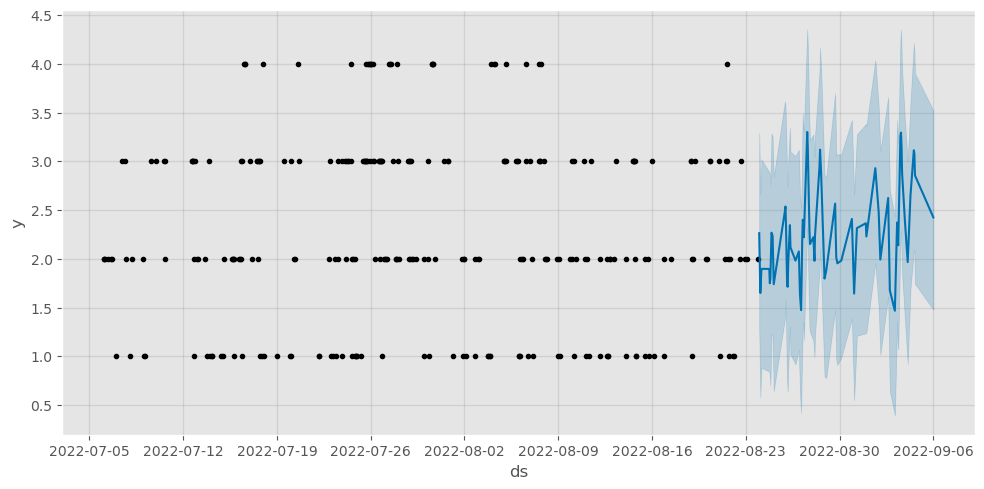

In [98]:
fig, ax = plt.subplots(figsize=(10,5))
fig = model.plot(level_test_fcst, ax= ax)
plt.show()

this is show predictive range value

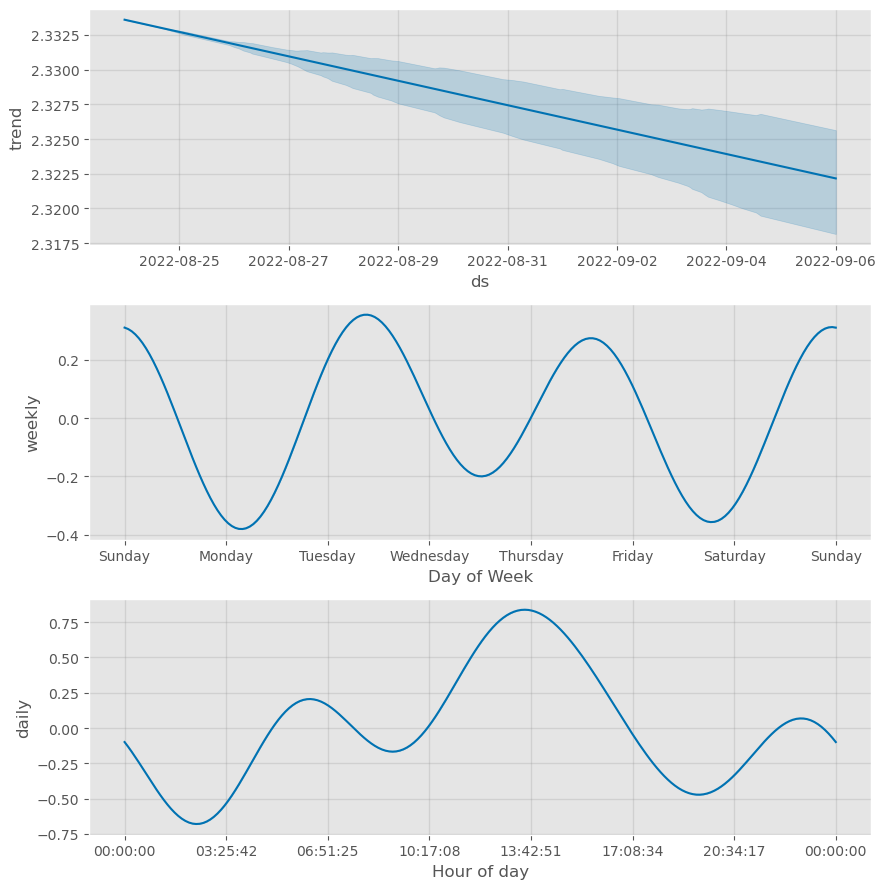

In [99]:
fig = model.plot_components(level_test_fcst)
plt.show()

### Compare Forecast to Actuals

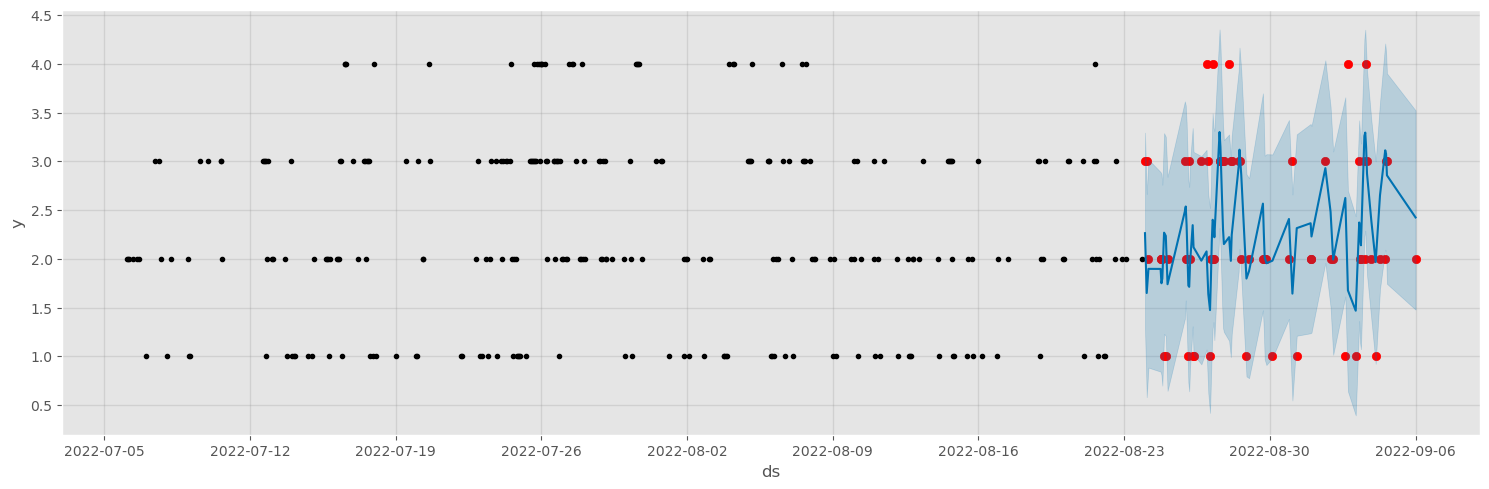

In [100]:
## Plot the forecast with the actuals

f, ax = plt.subplots(figsize=(15,5))
ax.scatter(level_test.index, level_test['median_level'],color='r')
fig = model.plot(level_test_fcst, ax= ax)

In [101]:
df3_copy.iloc[280]

median_level    3
Name: 2022-08-24 00:00:00, dtype: int32

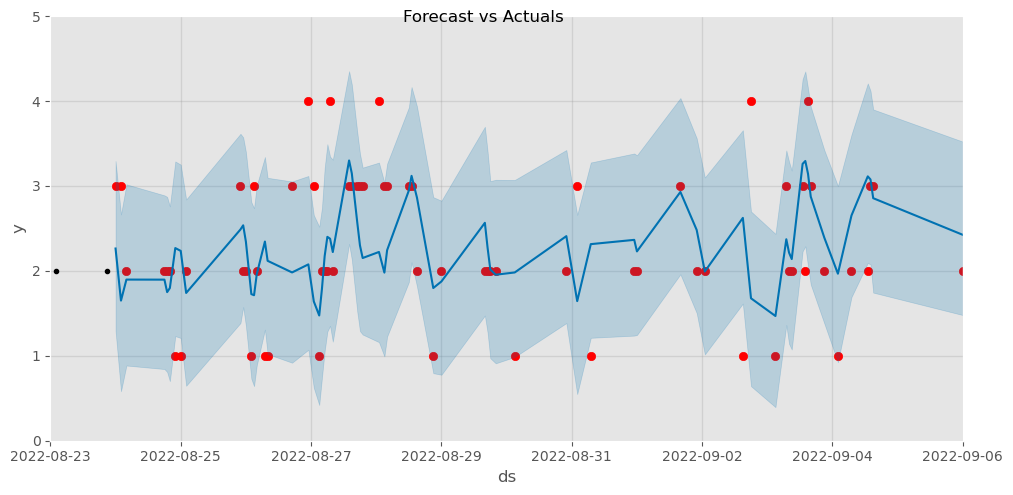

In [102]:
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(level_test.index, level_test['median_level'], color = 'r')
fig = model.plot(level_test_fcst, ax = ax)
ax.set_xbound(lower='08-23-2022',
             upper='09-06-2022')
ax.set_ylim(0,5)
plot = plt.suptitle('Forecast vs Actuals')

blue is forecast and red is actual

### Evaluate the model with Error Metrics

In [103]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

In [104]:
np.sqrt(mean_squared_error(y_true=level_test['median_level'],
                          y_pred=level_test_fcst['yhat']))

0.8401514519464747

It's pretty big value error :(( so sad

In [105]:
mean_squared_error(y_true=level_test['median_level'],
                          y_pred=level_test_fcst['yhat'])

0.7058544622077696

In [106]:
mean_absolute_percentage_error(y_true=level_test['median_level'],
                          y_pred=level_test_fcst['yhat'])

0.3493891662149455

### Predict into the Future 

In [107]:
future = model.make_future_dataframe(periods=365, freq='h',include_history=False)
forecast = model.predict(future)

In [108]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
360,2022-09-07 22:00:00,2.320475,1.253774,3.358026,2.315782,2.324900,-0.064323,-0.064323,-0.064323,-0.011495,-0.011495,-0.011495,-0.052827,-0.052827,-0.052827,0.0,0.0,0.0,2.256153
361,2022-09-07 23:00:00,2.320439,1.253570,3.419624,2.315737,2.324894,0.038703,0.038703,0.038703,0.064496,0.064496,0.064496,-0.025792,-0.025792,-0.025792,0.0,0.0,0.0,2.359142
362,2022-09-08 00:00:00,2.320402,1.147999,3.246059,2.315693,2.324871,-0.097262,-0.097262,-0.097262,-0.099424,-0.099424,-0.099424,0.002162,0.002162,0.002162,0.0,0.0,0.0,2.223140
363,2022-09-08 01:00:00,2.320365,0.879312,3.030208,2.315649,2.324844,-0.381590,-0.381590,-0.381590,-0.412226,-0.412226,-0.412226,0.030636,0.030636,0.030636,0.0,0.0,0.0,1.938775
364,2022-09-08 02:00:00,2.320329,0.678406,2.740413,2.315590,2.324821,-0.592602,-0.592602,-0.592602,-0.651822,-0.651822,-0.651822,0.059220,0.059220,0.059220,0.0,0.0,0.0,1.727727
